In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import deepgraph as dg
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline 

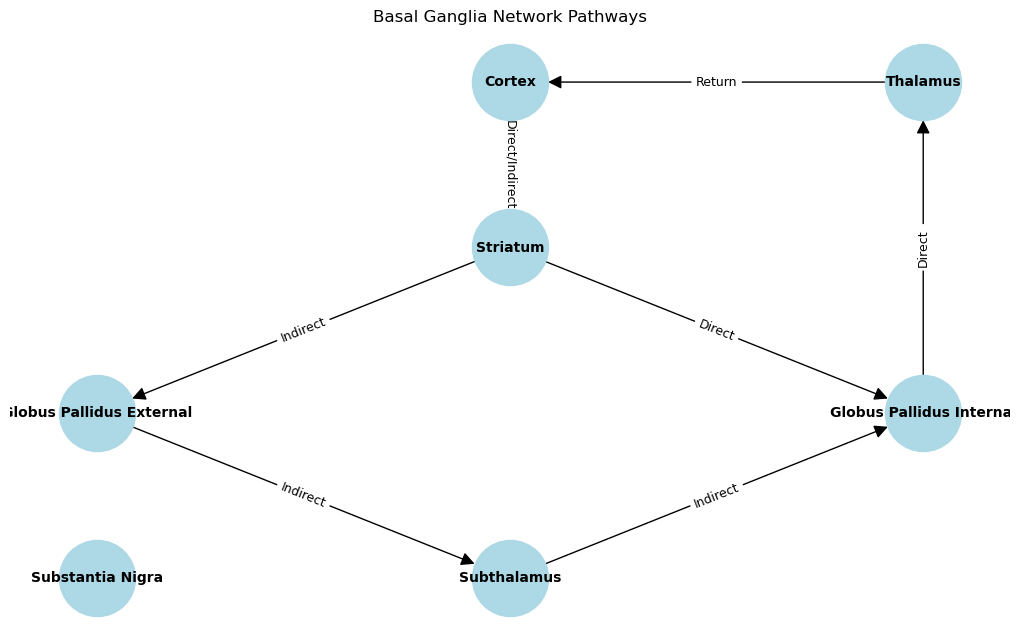

In [2]:
# Create a directed graph
G = nx.DiGraph()

# Define nodes and their layers
nodes = {
    'Cortex': (0, 3),
    'Striatum': (0, 2),
    'Globus Pallidus Internal': (1, 1),
    'Globus Pallidus External': (-1, 1),
    'Subthalamus': (0, 0),
    'Thalamus': (1, 3),
    'Substantia Nigra': (-1, 0)
}

# Add nodes to the graph
G.add_nodes_from(nodes.keys())

# Define edges for the pathways
edges = [
    # Direct Pathway
    ('Cortex', 'Striatum'),
    ('Striatum', 'Globus Pallidus Internal'),
    ('Globus Pallidus Internal', 'Thalamus'),
    ('Thalamus', 'Cortex'),

    # Indirect Pathway
    ('Striatum', 'Globus Pallidus External'),
    ('Globus Pallidus External', 'Subthalamus'),
    ('Subthalamus', 'Globus Pallidus Internal')
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 6))
pos = nodes  # Position layout

nx.draw(
    G, pos,
    with_labels=True,
    node_size=3000,
    node_color='lightblue',
    font_size=10,
    font_weight='bold',
    arrowsize=20,
    edge_color='black'
)

# Draw edge labels to show pathway types
edge_labels = {
    ('Cortex', 'Striatum'): 'Direct/Indirect',
    ('Striatum', 'Globus Pallidus Internal'): 'Direct',
    ('Globus Pallidus Internal', 'Thalamus'): 'Direct',
    ('Thalamus', 'Cortex'): 'Return',

    ('Striatum', 'Globus Pallidus External'): 'Indirect',
    ('Globus Pallidus External', 'Subthalamus'): 'Indirect',
    ('Subthalamus', 'Globus Pallidus Internal'): 'Indirect'
}

nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

plt.title('Basal Ganglia Network Pathways')
plt.show()


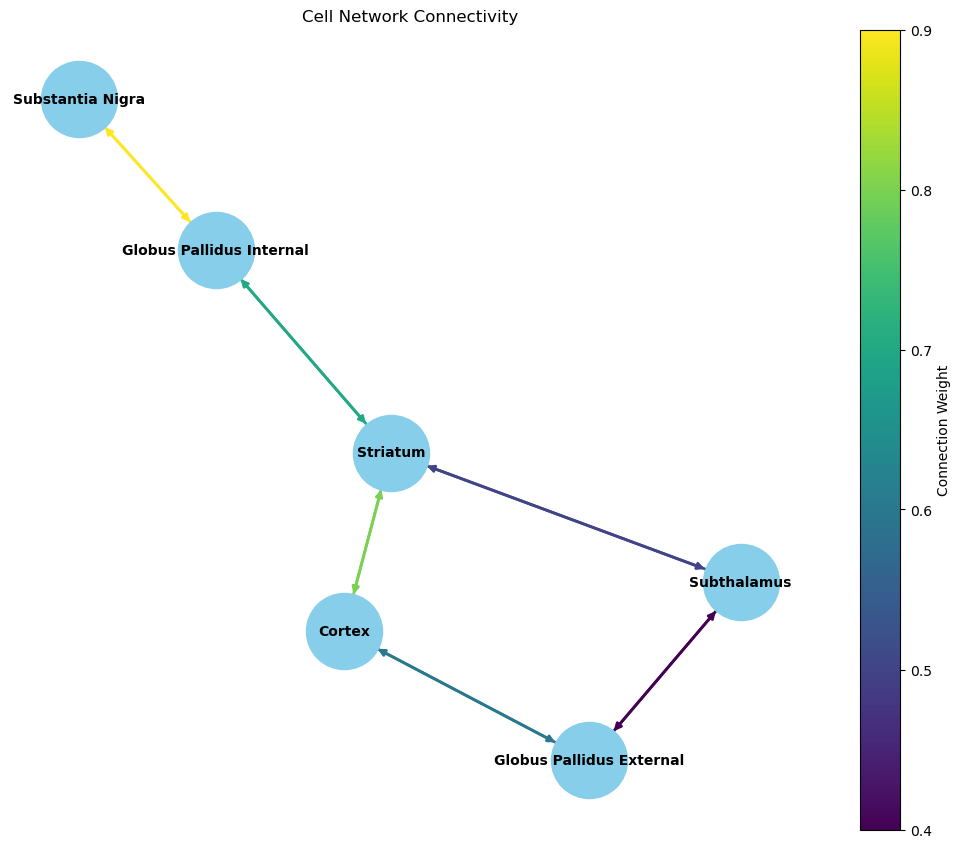

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.cm as cm
import matplotlib.colorbar as colorbar

def visualize_cell_network():
    # 노드 정의
    nodes = ['Cortex', 'Striatum', 'Globus Pallidus External', 
             'Globus Pallidus Internal', 'Subthalamus', 'Substantia Nigra']
    
    # 연결 행렬 정의
    connection_matrix = np.array([
        [0, 1, 1, 0, 0, 0],  # Cortex
        [1, 0, 0, 1, 1, 0],  # Striatum
        [1, 0, 0, 0, 1, 0],  # GPe
        [0, 1, 0, 0, 0, 1],  # GPi
        [0, 1, 1, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 1, 0, 0]   # SN
    ])
    
    # 연결 확률 행렬 정의
    prob_matrix = np.array([
        [0, 0.8, 0.6, 0, 0, 0],  # Cortex
        [0.8, 0, 0, 0.7, 0.5, 0],  # Striatum
        [0.6, 0, 0, 0, 0.4, 0],  # GPe
        [0, 0.7, 0, 0, 0, 0.9],  # GPi
        [0, 0.5, 0.4, 0, 0, 0],  # Subthalamus
        [0, 0, 0, 0.9, 0, 0]   # SN
    ])
    
    # 엣지 리스트 생성
    edges = []
    weights = []
    for i in range(len(nodes)):
        for j in range(len(nodes)):
            if connection_matrix[i, j] == 1:
                edges.append((nodes[i], nodes[j]))
                weights.append(prob_matrix[i, j])

    # NetworkX 그래프 객체 생성
    G = nx.DiGraph()  # 방향성 그래프
    for i, node in enumerate(nodes):
        G.add_node(node, pos=(np.random.rand(), np.random.rand()))  # 랜덤 위치 할당

    # 엣지 추가 (가중치 적용)
    for (src, dst), weight in zip(edges, weights):
        G.add_edge(src, dst, weight=weight)

    # 노드 위치 설정
    pos = nx.spring_layout(G, seed=42)

    # 엣지 색상 설정 (가중치 기반)
    norm = plt.Normalize(vmin=min(weights), vmax=max(weights))
    edge_colors = [cm.viridis(norm(w)) for w in weights]

    # 그래프 시각화
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=3000, font_size=10, 
            font_weight='bold', edge_color=edge_colors, width=2.0)
    plt.title('Cell Network Connectivity')

    # 컬러바 추가
    sm = plt.cm.ScalarMappable(cmap=cm.viridis, norm=norm)  # 컬러 매핑 객체 생성
    sm.set_array([])  # 빈 배열 설정 (필수)
    cbar = plt.colorbar(sm, ax=plt.gca(), label='Connection Weight')  # 현재 Axes에 컬러바 추가
    plt.show()

# 함수 호출
visualize_cell_network()

In [1]:
import plotly.graph_objects as go

# 뉴런 그룹 (열)
labels = ["CTX", "FSN", "MSN D1", "MSN D2", "GPe", "STN", "SNr"]

# 연결 관계 (출발지와 목적지의 인덱스, 연결 강도)
# 출발지: source, 목적지: target, 연결 강도: value
source = [0, 1, 1, 2, 2, 3, 4, 5]  # 출발 뉴런 그룹 인덱스
target = [1, 2, 3, 3, 4, 5, 5, 6]  # 연결된 뉴런 그룹 인덱스
value =  [8, 10, 6, 4, 7, 5, 3, 6]  # 연결 강도 (가중치)

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  # 뉴런 그룹 라벨
        color="blue"   # 노드 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  # 링크 색상 및 투명도
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [4]:
import plotly.graph_objects as go

labels = ["CTX", "FSN"]

source = [0, 1] 
target = [1, 2]  
value =  [8, 16]  

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,  # 뉴런 그룹 라벨
        color="blue"   # 노드 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color="rgba(31, 119, 180, 0.5)"  # 링크 색상 및 투명도
    )
))

fig.update_layout(title_text="Neural Network Connectivity", font_size=12)
fig.show()


In [29]:
import plotly.graph_objects as go

labels = ["CTX1-1", "CTX1-2", "CTX1-3", 
          "CTX2-1", "CTX2-2", "CTX2-3", 
          "CTX3-1", "CTX3-2", "CTX3-3", 
          "FSN1", "FSN2", "FSN3"]

# set node parameter 
source = [0, 3, 6,   # CTX1 → FSN
          1, 4, 7,   # CTX2 → FSN
          2, 5, 8]   # CTX3 → FSN

target = [9, 10, 11,  # FSN1, FSN2, FSN3
          9, 10, 11,  
          9, 10, 11]

# 각 연결의 가중치 설정 (FSN1에 대한 연결 확률이 가장 큼)
value =  [8, 5, 3,   # CTX1 → FSN 연결 가중치
          7, 4, 2,   # CTX2 → FSN 연결 가중치
          6, 3, 2]   # CTX3 → FSN 연결 가중치

# Sankey Diagram 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*9 + ["red"]*3  # CTX 그룹은 파란색, FSN은 빨간색
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.7)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.7)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)"] * 2  # 가중치별 투명도 조정
    )
))

fig.show()


In [2]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN2, FSN1, FSN3
    2, 2, 2    # CTX3 → FSN3, FSN1, FSN2
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    4, 3, 5,   # CTX2 → FSN2, FSN1, FSN3
    5, 3, 4    # CTX3 → FSN3, FSN1, FSN2
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN2 (높은), FSN1 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN3 (높은), FSN1 (중간), FSN2 (낮음)
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"],  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.8)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"]
    )
))

fig.show()

In [8]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
    2, 2, 2    # CTX3 → FSN1, FSN2, FSN3
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    3, 4, 5,   # CTX2 → FSN1, FSN2, FSN3
    5, 3, 4    # CTX3 → FSN1, FSN2, FSN3
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
]

# 색상 그라데이션 설정
colors = [
    "rgba(31, 119, 180, 0.8)",  # CTX1 → FSN1
    "rgba(31, 119, 180, 0.5)",  # CTX1 → FSN2
    "rgba(31, 119, 180, 0.3)",  # CTX1 → FSN3
    "rgba(255, 0, 0, 0.8)",     # CTX2 → FSN1
    "rgba(255, 0, 0, 0.5)",     # CTX2 → FSN2
    "rgba(255, 0, 0, 0.3)",     # CTX2 → FSN3
    "rgba(50, 205, 50, 0.8)",    # CTX3 → FSN1
    "rgba(50, 205, 50, 0.5)",    # CTX3 → FSN2
    "rgba(50, 205, 50, 0.3)"     # CTX3 → FSN3
]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue", "blue", "blue", "red", "red", "red"],  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # 그라데이션 색상 적용
    )
))

fig.show()

In [16]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", "FSN1", "FSN2", "FSN3"]

# CTX 그룹 → FSN 연결
source = [
    0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
    1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
    2, 2, 2    # CTX3 → FSN1, FSN2, FSN3
]

target = [
    3, 4, 5,   # CTX1 → FSN1, FSN2, FSN3
    3, 4, 5,   # CTX2 → FSN1, FSN2, FSN3
    5, 3, 4    # CTX3 → FSN1, FSN2, FSN3
]

value = [
    8, 5, 3,   # CTX1: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3,   # CTX2: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
    8, 5, 3    # CTX3: FSN1 (높은), FSN2 (중간), FSN3 (낮음)
]

# FSN 노드를 세분화하여 색상 처리
# FSN1은 CTX1, CTX2, CTX3에서 받는 입력의 강도에 따른 색상 그라데이션
fsn_colors = [
    "rgba(31, 119, 180, 0.8)",  # CTX1 → FSN1
    "rgba(31, 119, 180, 0.5)",  # CTX1 → FSN2
    "rgba(31, 119, 180, 0.3)",  # CTX1 → FSN3
    "rgba(255, 0, 0, 0.8)",     # CTX2 → FSN1
    "rgba(255, 0, 0, 0.5)",     # CTX2 → FSN2
    "rgba(255, 0, 0, 0.3)",     # CTX2 → FSN3
    "rgba(50, 205, 50, 0.8)",   # CTX3 → FSN1
    "rgba(50, 205, 50, 0.5)",   # CTX3 → FSN2
    "rgba(50, 205, 50, 0.3)"    # CTX3 → FSN3
]

# FSN 색상 그라데이션을 각 FSN에 맞게 세분화
fsn_color_map = {
    3: ["rgba(31, 119, 180, 0.8)", "rgba(255, 0, 0, 0.8)", "rgba(50, 205, 50, 0.8)"],  # FSN1
    4: ["rgba(31, 119, 180, 0.5)", "rgba(255, 0, 0, 0.5)", "rgba(50, 205, 50, 0.5)"],  # FSN2
    5: ["rgba(31, 119, 180, 0.3)", "rgba(255, 0, 0, 0.3)", "rgba(50, 205, 50, 0.3)"]   # FSN3
}

# FSN1, FSN2, FSN3에 각각 세분화된 색상 배정
colors = []
for s, t in zip(source, target):
    # 각 연결에 대한 색상 처리
    if t == 3:  # FSN1
        colors.append(fsn_color_map[3][source.index(s) % 3])  # CTX1 → FSN1, CTX2 → FSN1, CTX3 → FSN1
    elif t == 4:  # FSN2
        colors.append(fsn_color_map[4][source.index(s) % 3])  # CTX1 → FSN2, CTX2 → FSN2, CTX3 → FSN2
    elif t == 5:  # FSN3
        colors.append(fsn_color_map[5][source.index(s) % 3])  # CTX1 → FSN3, CTX2 → FSN3, CTX3 → FSN3

# Sankey 도표 그리기
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=30,
        line=dict(color="black", width=0.5),
        label=labels,
        color=colors,  # CTX 그룹과 FSN 그룹
        x=[0.1, 0.1, 0.1, 0.9, 0.9, 0.9],  # CTX는 왼쪽, FSN은 오른쪽
        y=[0.1, 0.5, 0.9, 0.1, 0.5, 0.9],  # CTX1, 2, 3 각각 수직 위치 다르게
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=colors  # 연결에 색상 적용
    )
))

fig.show()


In [5]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# 색상 설정
ctx_colors = ["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)"]  # CTX 색상
fsn_colors = ["rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)"]  # FSN 색상
msnd_colors = ["rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"]  # MSND 색상

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[ctx_colors[0] if s < 3 else fsn_colors[0] for s in source] +  # CTX에서 FSN으로의 연결 색상
              [fsn_colors[0]] * 3 +  # FSN에서 MSND1으로의 연결 색상
              [fsn_colors[1]] * 3  # FSN에서 MSND2으로의 연결 색상
    )
))

fig.show()

In [4]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)",
               "rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)",
               "rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"] * 2  # 강도별 투명도 조정
    )
))

fig.show()

In [15]:
import plotly.graph_objects as go

labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

source = [0, 0, 0,   
          1, 1, 1,   
          2, 2, 2,   
          3, 4, 5,   
          3, 4, 5]   

target = [3, 4, 5,   
          3, 4, 5,   
          3, 4, 5,   
          6, 6, 6,   
          7, 7, 7]   

value = [8, 5, 3,   
         4, 6, 4,   
         3, 5, 8,   
         5, 3, 2,   
         3, 3, 4]   

fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green"]*2
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.6)"] * 3 +  # CTX1
              ["rgba(255, 0, 0, 0.6)"] * 3 +   # CTX2
              ["rgba(50, 205, 50, 0.6)"] * 3 + # CTX3
              ["rgba(80, 120, 0, 0.7)"] * 3 + # FSN to MSND1
              ["rgba(60, 90, 0, 0.5)"] * 3   # FSN to MSND2
    )
))

fig.show()

In [4]:
import plotly.graph_objects as go

# 노드 라벨 (MSND1, MSND2 추가)
labels = ["CTX1", "CTX2", "CTX3", 
          "FSN1", "FSN2", "FSN3", 
          "MSND1", "MSND2"]

# CTX 그룹 → FSN 및 FSN → MSND 연결 설정
source = [0, 0, 0,   # CTX1 → FSN1, FSN2, FSN3
          1, 1, 1,   # CTX2 → FSN1, FSN2, FSN3
          2, 2, 2,   # CTX3 → FSN1, FSN2, FSN3
          3, 4, 5,   # FSN1, FSN2, FSN3 → MSND1
          3, 4, 5]   # FSN1, FSN2, FSN3 → MSND2

target = [3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          3, 4, 5,   # FSN 노드
          6, 6, 6,   # MSND1 연결
          7, 7, 7]   # MSND2 연결

# 가중치 설정 (연결 강도)
value = [8, 5, 3,   # CTX1 → FSN
         7, 6, 4,   # CTX2 → FSN
         6, 5, 4,   # CTX3 → FSN
         5, 3, 2,   # FSN → MSND1
         4, 3, 2]   # FSN → MSND2

# 색상 설정
ctx_colors = ["rgba(31, 119, 180, 0.8)", "rgba(31, 119, 180, 0.6)", "rgba(31, 119, 180, 0.4)"]  # CTX 색상
fsn_colors = ["rgba(255, 0, 0, 0.8)", "rgba(255, 0, 0, 0.6)", "rgba(255, 0, 0, 0.4)"]  # FSN 색상
msnd_colors = ["rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)"]  # MSND 색상

# Sankey 다이어그램 생성
fig = go.Figure(go.Sankey(
    node=dict(
        pad=10,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*3 + ["red"]*3 + ["green", "green"]  # CTX, FSN, MSND 구분 색상
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=[ctx_colors[0] if s < 3 else fsn_colors[0] for s in source] +  # CTX에서 FSN으로의 연결 색상
              [fsn_colors[0]] * 3 +  # FSN에서 MSND1으로의 연결 색상
              [fsn_colors[1]] * 3  # FSN에서 MSND2으로의 연결 색상
    )
))

fig.show()

In [34]:
import plotly.graph_objects as go

labels = ["CTX1-1", "CTX1-2", "CTX1-3", 
          "CTX2-1", "CTX2-2", "CTX2-3", 
          "CTX3-1", "CTX3-2", "CTX3-3", 
          "FSN1", "FSN2", "FSN3",
          "MSND1", "MSND2"]

source = [0, 3, 6,   
          1, 4, 7,   
          2, 5, 8,   
          0, 1, 2,   
          3, 4, 5,   
          6, 7, 8]

target = [9, 10, 11,  
          9, 10, 11,  
          9, 10, 11,  
          12, 12, 12,  
          13, 13, 13,  
          12, 12, 12]

value = [8, 5, 3,   
         7, 4, 2,   
         6, 3, 2,   
         4, 3, 2,   
         3, 2, 1,   
         2, 1, 1]

fig = go.Figure(go.Sankey(
    node=dict(
        pad=5,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=labels,
        color=["blue"]*9 + ["red"]*3 + ["green"]*2  
    ),
    link=dict(
        source=source,
        target=target,
        value=value,
        color=["rgba(31, 119, 180, 0.7)", "rgba(31, 119, 180, 0.5)", "rgba(31, 119, 180, 0.3)",
               "rgba(255, 0, 0, 0.7)", "rgba(255, 0, 0, 0.5)", "rgba(255, 0, 0, 0.3)",
               "rgba(50, 205, 50, 0.7)", "rgba(50, 205, 50, 0.5)", "rgba(50, 205, 50, 0.3)"] * 2
    )
))

fig.update_layout(
    font_size=12
)

fig.show()